In [196]:
from nptdms import TdmsFile
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

In [197]:

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [198]:
fileName = "/data/new_trap/Misc/DigitizationNoise_4305_20210928/1.tdms"
tFile = TdmsFile.read(file)

In [199]:
signalTDMS = tFile.as_dataframe(time_index=True)

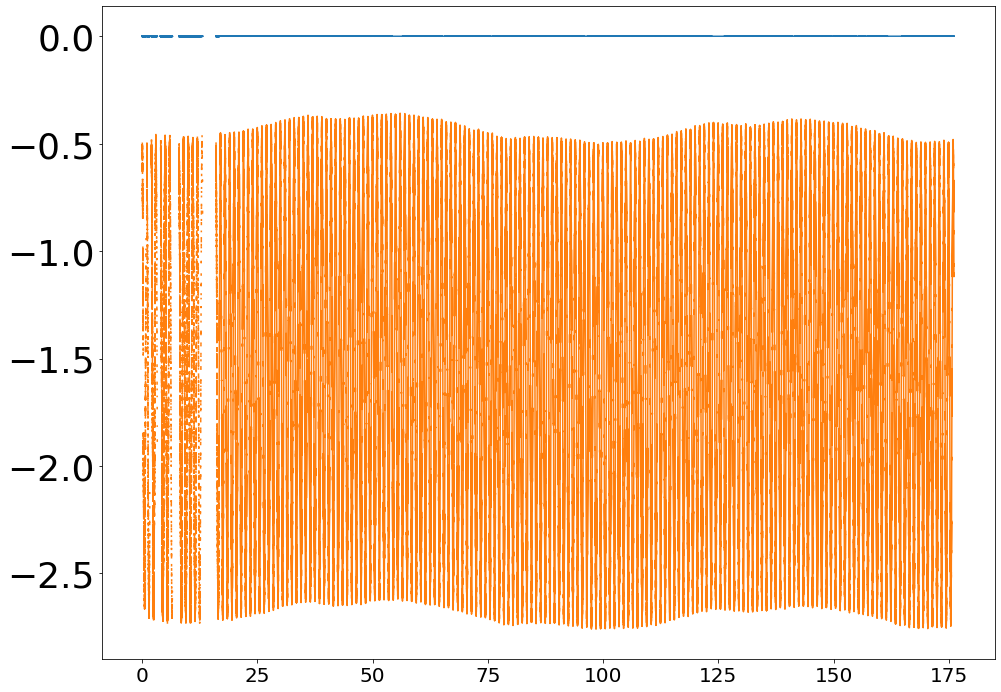

In [200]:
plt.plot(signalTDMS["/\'ai\'/\'phaseNoise0\'"])
plt.plot(signalTDMS["/\'ai\'/\'phaseNoise1\'"])

In [169]:
len(signalTDMS)/10e3

176.128

In [190]:
fftDict = {'fs':10000,}
fftDict['nperseg'] = int(176.128*fftDict['fs'])
#fftDict['window'] = signal.get_window(('tukey',0.25),fftDict['nperseg'])
fftDict['window'] = signal.get_window(('hanning'),fftDict['nperseg'])

fftDict['scaling'] = "density"

def computeFFT(file):
    tFile = TdmsFile.read(file)
    signalTDMS = tFile.as_dataframe()
    ff, Pxx = signal.welch(signalTDMS["/\'ai\'/\'phaseNoise1\'"], **fftDict)
    return(ff, Pxx)

In [191]:
ff,Pxx = computeFFT(fileName)

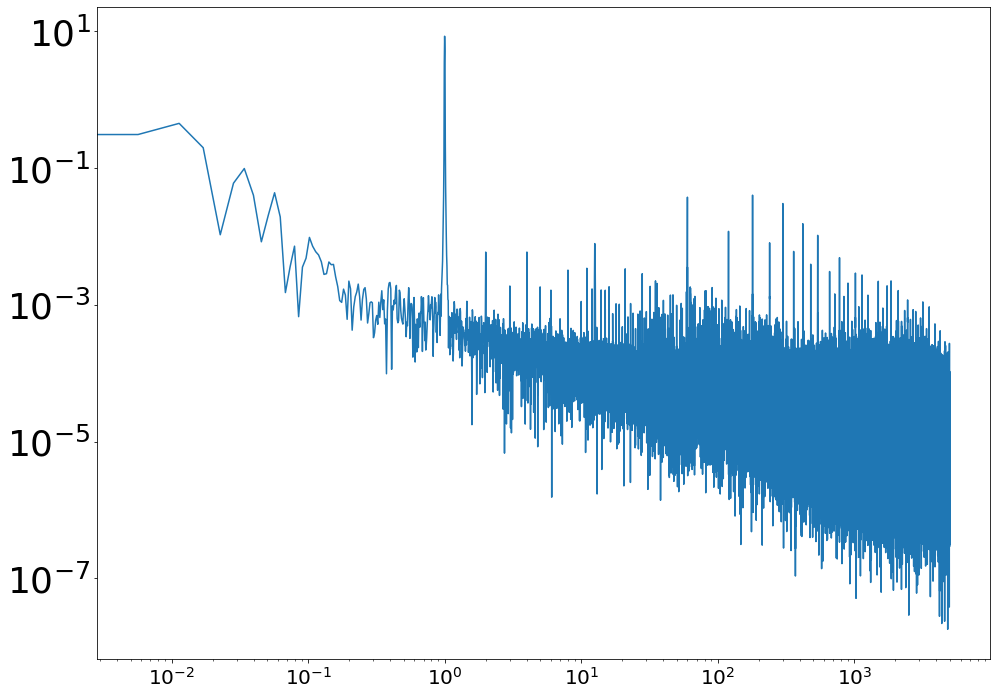

In [192]:
plt.loglog(ff,np.sqrt(Pxx))

In [124]:
fsamp= 10000
res = 1761280
data=signalTDMS["/\'ai\'/\'phaseNoise1\'"]
data_det=signal.detrend(data)
xpsd, freqs = matplotlib.mlab.psd(data_det, Fs = fsamp, NFFT = res,window=window.)



data2=signalTDMS["/\'ai\'/\'phaseNoise0\'"]
data_det2=signal.detrend(data2)
xpsd2, freqs2 = matplotlib.mlab.psd(data_det2, Fs = fsamp, NFFT = res,window=window.None)

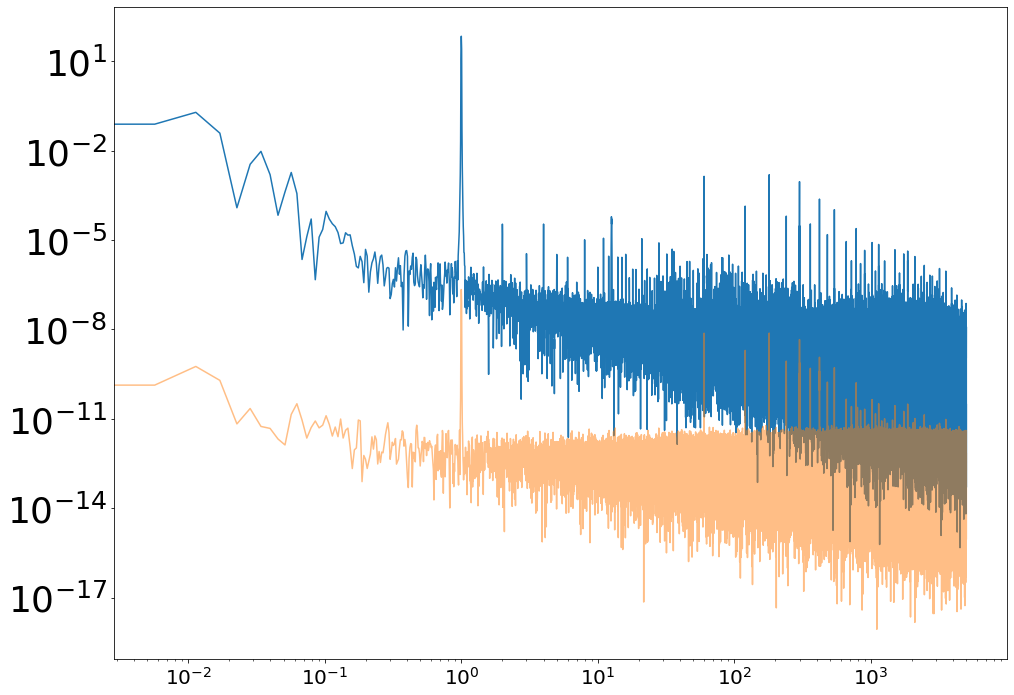

In [155]:
plt.loglog(freqs,xpsd)
plt.loglog(freqs,xpsd2,alpha=0.5)
plt.show()

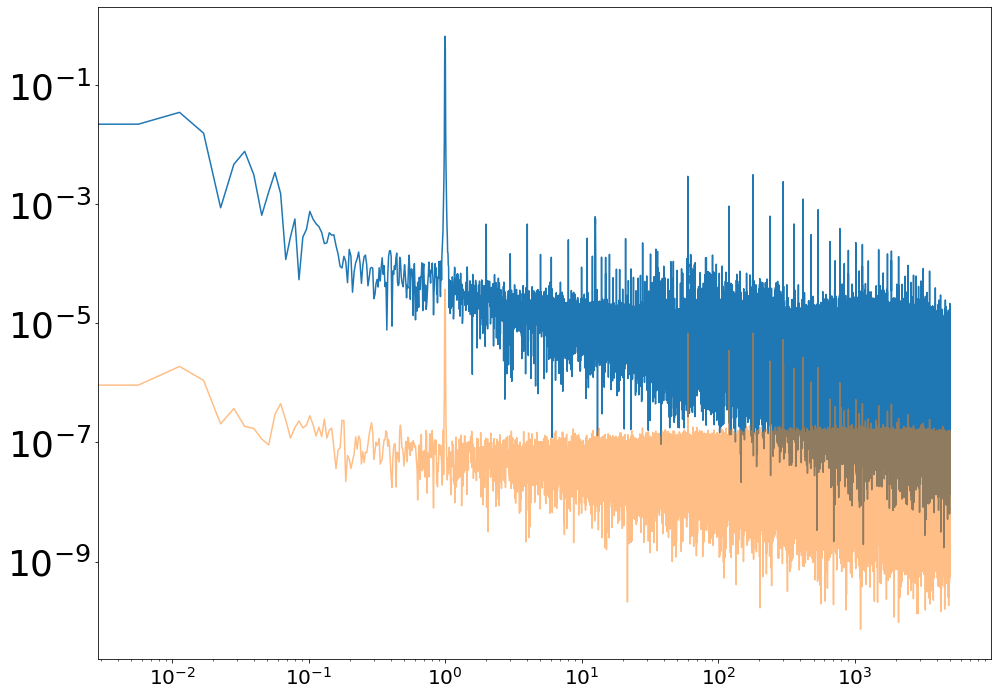

In [132]:
plt.loglog(freqs,np.sqrt(xpsd)*np.deg2rad(90/20))
plt.loglog(freqs,np.sqrt(xpsd2)*np.deg2rad(90/20),alpha=0.5)
plt.show()

In [128]:
freqs[np.argmax(np.sqrt(xpsd))]

0.9992732558139534

In [134]:
np.rad2deg(np.max(np.sqrt(xpsd))*np.deg2rad(90/20))

37.68253351191267

In [195]:
f1 = np.sin(2*np.pi+0)
f2 = np.sin(2*np.pi+np.pi/2)